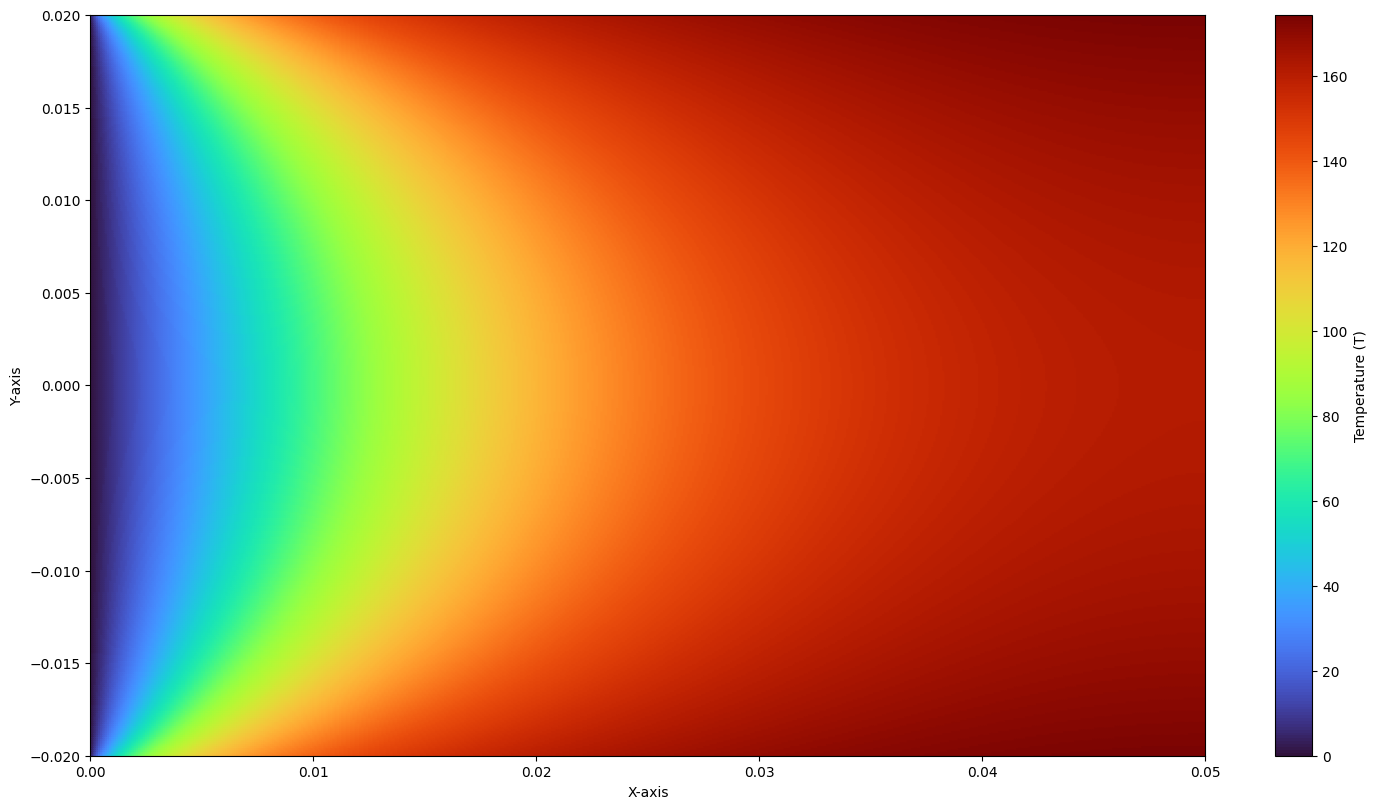

In [7]:
import numpy as np
import matplotlib.pyplot as plt

L = 0.05
th = 0.04
k = 0.5
h = 100
Tb = 200
Tinf = 20

x_pos = np.linspace(0, L, 500)
y_pos = np.linspace(-th / 2, th / 2, 400)

domain_x, domain_y = np.meshgrid(x_pos, y_pos)

n_eigenvalues = 100
eigenvectors = np.pi * (2 * np.array([i for i in range(n_eigenvalues)]) + 1) / (2 * L)

Ci = (
    2
    * (Tb - Tinf)
    / (
        L
        * eigenvectors
        * (
            k * eigenvectors * np.sinh(eigenvectors * th / 2) / h
            + np.cosh(eigenvectors * th / 2)
        )
    )
)
T = sum(
    [
        ci * np.sin(eigen_v * domain_x) * np.cosh(eigen_v * domain_y)
        for ci, eigen_v in zip(Ci, eigenvectors)
    ]
)

plt.figure(figsize=(15, 8))
sc = plt.scatter(domain_x, domain_y, c=T, cmap="turbo", s=2)
plt.clim([T.min(), T.max()])
plt.xlim((domain_x.min(), domain_x.max()))
plt.ylim((domain_y.min(), domain_y.max()))
plt.tight_layout()

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
cbar = plt.colorbar(sc)
cbar.set_label("Temperature (T)")

plt.show()

C:\Users\Pablo\AppData\Local\Temp\ipykernel_10532\477435895.py:23: RuntimeWarning: divide by zero encountered in divide
  m = (2 * h / (k * thickness_arr)) ** 0.5


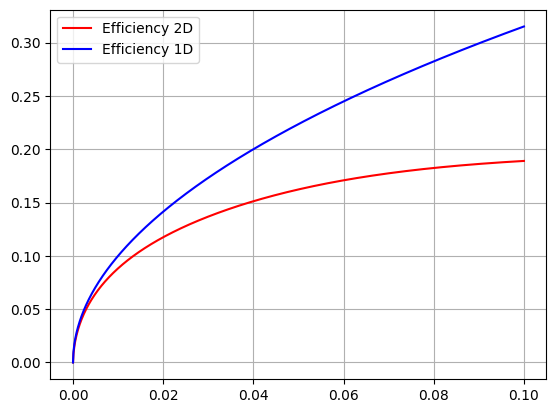

In [9]:
n_eigenvalues = 100
eigenvectors = np.pi * (2 * np.array([i for i in range(n_eigenvalues)]) + 1) / (2 * L)

thickness_arr = np.linspace(0, 0.1, 1000)
eff_2D = (
    2
    * k
    / (h * L**2)
    * sum(
        [
            np.sinh(ei * thickness_arr / 2)
            / (
                ei
                * (
                    k * ei * np.sinh(ei * thickness_arr / 2) / h
                    + np.cosh(ei * thickness_arr / 2)
                )
            )
            for ei in eigenvectors
        ]
    )
)
m = (2 * h / (k * thickness_arr)) ** 0.5
eff_1D = np.tanh(m * L) / (m * L)

plt.plot(thickness_arr, eff_2D, c="red", label="Efficiency 2D")
plt.plot(thickness_arr, eff_1D, c="blue", label="Efficiency 1D")
plt.legend()
plt.grid()
plt.show()